In [19]:
import pandas as pd, scipy, matplotlib.pyplot as plt, scipy.optimize as sp, numpy as np
%matplotlib inline

In [329]:
c='bitcoin'
df=pd.read_html('http://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20170701')[1]
df['t']=pd.to_datetime(df['Date'])
df=df.sort_index(by='t').reset_index()
df['x']=df.index
df.head(2)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,index,Date,Open,High,Low,Close,Volume,Market Cap,t,x
0,1524,"Apr 28, 2013",135.30,135.98,132.1,134.21,-,1500520000,2013-04-28,0
1,1523,"Apr 29, 2013",134.44,147.49,134.0,144.54,-,1491160000,2013-04-29,1


In [330]:
def f(x, a, b, c):
    return a*x*x + b*x + c
def g(x, a, b, c):
    return a*np.exp(-b*x+c)
def h(x, a, b):
    return a*(x**b)
def r(x, a, b):
    return a*x+b
def rsq(xdata,ydata,fdata):
    residuals = ydata-fdata
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    return 1 - (ss_res / ss_tot)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in multiply


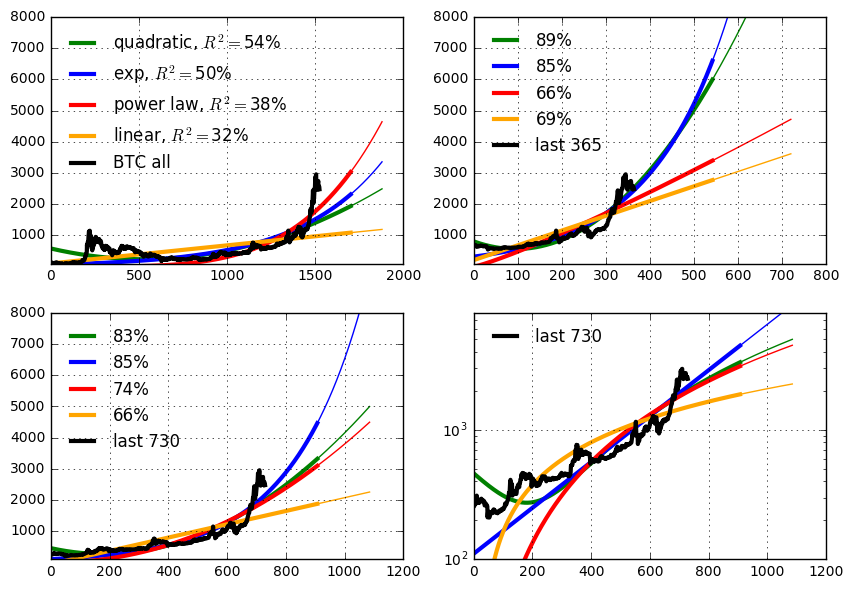

In [331]:
fig,ax=plt.subplots(2,2,figsize=(10,7))
z=178
f1=sp.curve_fit(f,df['x'].values,df['Close'].values)
g1=sp.curve_fit(g,df['x'].values,df['Close'].values)
h1=sp.curve_fit(h,df['x'].values,df['Close'].values)
r1=sp.curve_fit(r,df['x'].values,df['Close'].values)
x=np.arange(2,max(df['x'])+z)
x2=np.arange(2,max(df['x'])+z*2)
ax[0][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(df['x'].values,df['Close'].values,f(df['x'].values,*f1[0]))
ax[0][0].plot(x,fdata,lw=3,c='green',label='quadratic, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(df['x'].values,df['Close'].values,g(df['x'].values,*g1[0]))
ax[0][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label='exp, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(df['x'].values,df['Close'].values,h(df['x'].values,*h1[0]))
ax[0][0].plot(x,h(x,*h1[0]),lw=3,c='red',label='power law, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(df['x'].values,df['Close'].values,r(df['x'].values,*r1[0]))
ax[0][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label='linear, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][0].plot(df['x'],df['Close'],c='k',label='BTC all',lw=3)
ax[0][0].legend(loc=2,framealpha=0)

k=365
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[0][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[0][1].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[0][1].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
ax[0][1].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[0][1].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[0][1].legend(loc=2,framealpha=0)

k=365*2
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][0].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
ax[1][0].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][0].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][0].legend(loc=2,framealpha=0)

x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][1].plot(x,fdata,lw=3,c='green')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][1].plot(x,g(x,*g1[0]),lw=3,c='blue')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
ax[1][1].plot(x,h(x,*h1[0]),lw=3,c='red')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][1].plot(x,r(x,*r1[0]),lw=3,c='orange')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][1].legend(loc=2,framealpha=0)
ax[1][1].set_yscale('log')

y2=8000
ax[0][0].set_ylim(100,y2)
ax[0][1].set_ylim(100,y2)
ax[1][0].set_ylim(100,y2)
ax[1][1].set_ylim(100,y2)
plt.savefig(c+'.png')

In [332]:
c='ethereum'
df=pd.read_html('http://coinmarketcap.com/currencies/'+c+'/historical-data/?start=20130428&end=20170701')[1]
df['t']=pd.to_datetime(df['Date'])
df=df.sort_index(by='t').reset_index()
df['x']=df.index
df.head(2)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,index,Date,Open,High,Low,Close,Volume,Market Cap,t,x
0,693,"Aug 07, 2015",2.83,3.54,2.520000,2.770000,164329,-,2015-08-07,0
1,692,"Aug 08, 2015",2.79,2.80,0.714725,0.753325,674188,167911000,2015-08-08,1


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in multiply


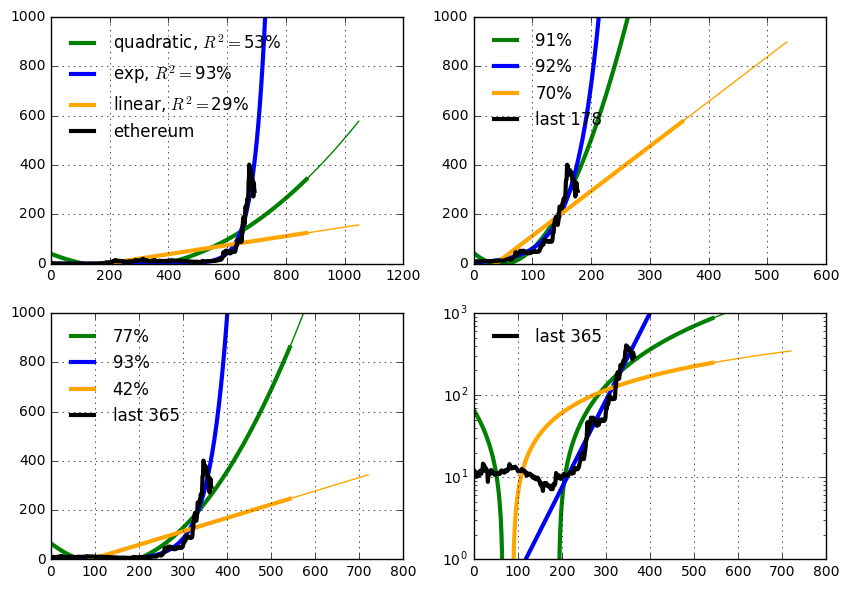

In [333]:
fig,ax=plt.subplots(2,2,figsize=(10,7))
z=178
f1=sp.curve_fit(f,df['x'].values,df['Close'].values)
g1=sp.curve_fit(g,df['x'].values,df['Close'].values)
#h1=sp.curve_fit(h,df['x'].values,df['Close'].values)
r1=sp.curve_fit(r,df['x'].values,df['Close'].values)
x=np.arange(2,max(df['x'])+z)
x2=np.arange(2,max(df['x'])+z*2)
ax[0][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(df['x'].values,df['Close'].values,f(df['x'].values,*f1[0]))
ax[0][0].plot(x,fdata,lw=3,c='green',label='quadratic, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(df['x'].values,df['Close'].values,g(df['x'].values,*g1[0]))
ax[0][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label='exp, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(df['x'].values,df['Close'].values,h(df['x'].values,*h1[0]))
#ax[0][0].plot(x,h(x,*h1[0]),lw=3,c='red',label='power law, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
#ax[0][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(df['x'].values,df['Close'].values,r(df['x'].values,*r1[0]))
ax[0][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label='linear, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][0].plot(df['x'],df['Close'],c='k',label=c,lw=3)
ax[0][0].legend(loc=2,framealpha=0)

k=178
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
#h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[0][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[0][1].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[0][1].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[0][1].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
#ax[0][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[0][1].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[0][1].legend(loc=2,framealpha=0)

k=365
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
#h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][0].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[1][0].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
#ax[1][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][0].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][0].legend(loc=2,framealpha=0)

x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][1].plot(x,fdata,lw=3,c='green')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][1].plot(x,g(x,*g1[0]),lw=3,c='blue')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[1][1].plot(x,h(x,*h1[0]),lw=3,c='red')#,label=repr(int(rlabel*10000)/100)+"%")
#ax[1][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][1].plot(x,r(x,*r1[0]),lw=3,c='orange')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][1].legend(loc=2,framealpha=0)
ax[1][1].set_yscale('log')

y1=1
y2=1000
ax[0][0].set_ylim(y1,y2)
ax[0][1].set_ylim(y1,y2)
ax[1][0].set_ylim(y1,y2)
ax[1][1].set_ylim(y1,y2)
plt.savefig(c+'.png')

In [334]:
c='litecoin'
df=pd.read_html('http://coinmarketcap.com/currencies/'+c+'/historical-data/?start=20130428&end=20170701')[1]
df['t']=pd.to_datetime(df['Date'])
df=df.sort_index(by='t').reset_index()
df['x']=df.index
df.head(2)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,index,Date,Open,High,Low,Close,Volume,Market Cap,t,x
0,1524,"Apr 28, 2013",4.30,4.40,4.18,4.35,-,73773400,2013-04-28,0
1,1523,"Apr 29, 2013",4.37,4.57,4.23,4.38,-,74952700,2013-04-29,1


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in multiply


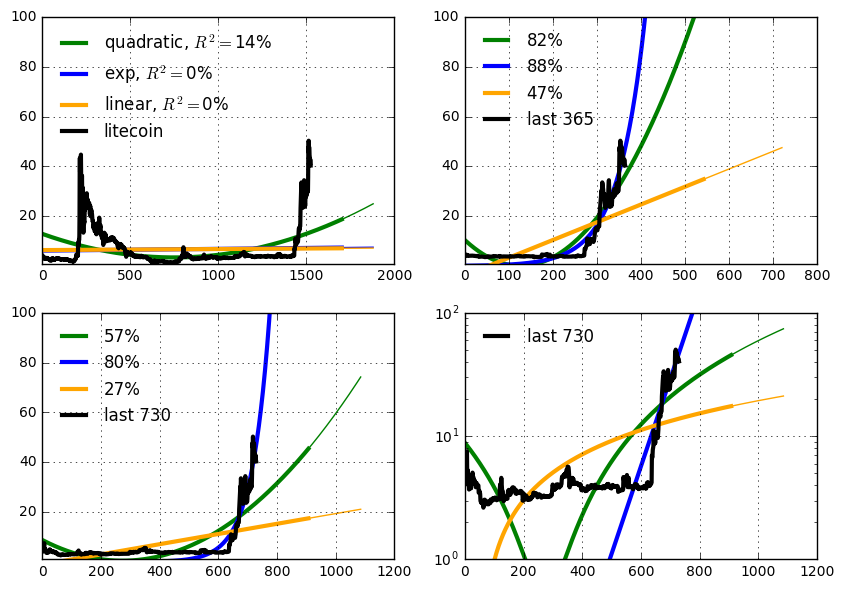

In [335]:
fig,ax=plt.subplots(2,2,figsize=(10,7))
z=178
f1=sp.curve_fit(f,df['x'].values,df['Close'].values)
g1=sp.curve_fit(g,df['x'].values,df['Close'].values)
#h1=sp.curve_fit(h,df['x'].values,df['Close'].values)
r1=sp.curve_fit(r,df['x'].values,df['Close'].values)
x=np.arange(2,max(df['x'])+z)
x2=np.arange(2,max(df['x'])+z*2)
ax[0][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(df['x'].values,df['Close'].values,f(df['x'].values,*f1[0]))
ax[0][0].plot(x,fdata,lw=3,c='green',label='quadratic, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(df['x'].values,df['Close'].values,g(df['x'].values,*g1[0]))
ax[0][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label='exp, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(df['x'].values,df['Close'].values,h(df['x'].values,*h1[0]))
#ax[0][0].plot(x,h(x,*h1[0]),lw=3,c='red',label='power law, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
#ax[0][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(df['x'].values,df['Close'].values,r(df['x'].values,*r1[0]))
ax[0][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label='linear, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][0].plot(df['x'],df['Close'],c='k',label=c,lw=3)
ax[0][0].legend(loc=2,framealpha=0)

k=365
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
#h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[0][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[0][1].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[0][1].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[0][1].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
#ax[0][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[0][1].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[0][1].legend(loc=2,framealpha=0)

k=365*2
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
#h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][0].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[1][0].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
#ax[1][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][0].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][0].legend(loc=2,framealpha=0)

x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][1].plot(x,fdata,lw=3,c='green')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][1].plot(x,g(x,*g1[0]),lw=3,c='blue')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[1][1].plot(x,h(x,*h1[0]),lw=3,c='red')#,label=repr(int(rlabel*10000)/100)+"%")
#ax[1][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][1].plot(x,r(x,*r1[0]),lw=3,c='orange')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][1].legend(loc=2,framealpha=0)
ax[1][1].set_yscale('log')

y1=1
y2=100
ax[0][0].set_ylim(y1,y2)
ax[0][1].set_ylim(y1,y2)
ax[1][0].set_ylim(y1,y2)
ax[1][1].set_ylim(y1,y2)
plt.savefig(c+'.png')

In [336]:
c='ripple'
df=pd.read_html('http://coinmarketcap.com/currencies/'+c+'/historical-data/?start=20130428&end=20170701')[1]
df['t']=pd.to_datetime(df['Date'])
df=df.sort_index(by='t').reset_index()
df['x']=df.index
df.head(2)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,index,Date,Open,High,Low,Close,Volume,Market Cap,t,x
0,1426,"Aug 04, 2013",0.005874,0.005927,0.005874,0.005882,-,45921000,2013-08-04,0
1,1425,"Aug 05, 2013",0.005875,0.005980,0.005613,0.005613,-,45928400,2013-08-05,1


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp


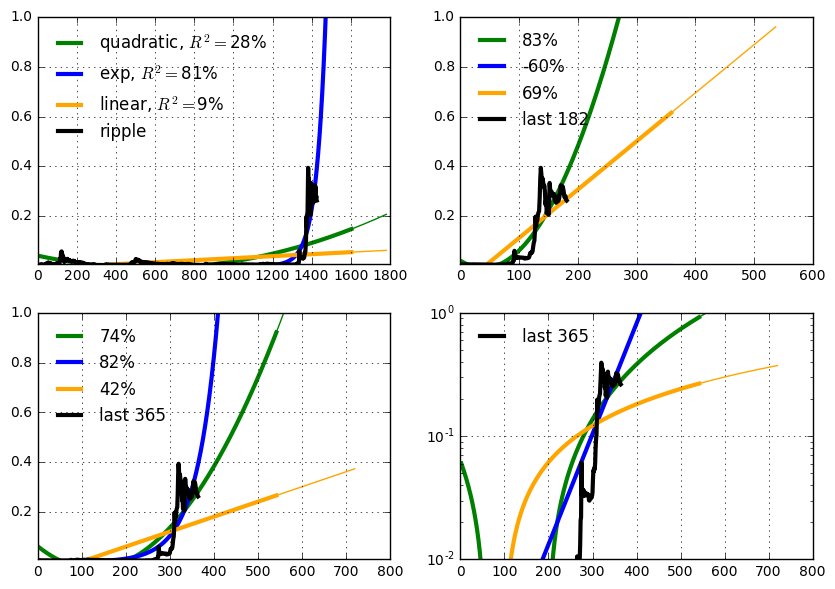

In [337]:
fig,ax=plt.subplots(2,2,figsize=(10,7))
z=178
f1=sp.curve_fit(f,df['x'].values,df['Close'].values)
g1=sp.curve_fit(g,df['x'].values,df['Close'].values)
#h1=sp.curve_fit(h,df['x'].values,df['Close'].values)
r1=sp.curve_fit(r,df['x'].values,df['Close'].values)
x=np.arange(2,max(df['x'])+z)
x2=np.arange(2,max(df['x'])+z*2)
ax[0][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(df['x'].values,df['Close'].values,f(df['x'].values,*f1[0]))
ax[0][0].plot(x,fdata,lw=3,c='green',label='quadratic, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(df['x'].values,df['Close'].values,g(df['x'].values,*g1[0]))
ax[0][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label='exp, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(df['x'].values,df['Close'].values,h(df['x'].values,*h1[0]))
#ax[0][0].plot(x,h(x,*h1[0]),lw=3,c='red',label='power law, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
#ax[0][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(df['x'].values,df['Close'].values,r(df['x'].values,*r1[0]))
ax[0][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label='linear, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][0].plot(df['x'],df['Close'],c='k',label=c,lw=3)
ax[0][0].legend(loc=2,framealpha=0)

k=365/2
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
#h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[0][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[0][1].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[0][1].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[0][1].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
#ax[0][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[0][1].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[0][1].legend(loc=2,framealpha=0)

k=365
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
#h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][0].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[1][0].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
#ax[1][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][0].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][0].legend(loc=2,framealpha=0)

x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][1].plot(x,fdata,lw=3,c='green')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][1].plot(x,g(x,*g1[0]),lw=3,c='blue')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
#ax[1][1].plot(x,h(x,*h1[0]),lw=3,c='red')#,label=repr(int(rlabel*10000)/100)+"%")
#ax[1][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][1].plot(x,r(x,*r1[0]),lw=3,c='orange')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][1].legend(loc=2,framealpha=0)
ax[1][1].set_yscale('log')

y1=0.01
y2=1
ax[0][0].set_ylim(y1,y2)
ax[0][1].set_ylim(y1,y2)
ax[1][0].set_ylim(y1,y2)
ax[1][1].set_ylim(y1,y2)
plt.savefig(c+'.png')

In [338]:
c='bitcoin'
df1=pd.read_html('http://coinmarketcap.com/currencies/'+c+'/historical-data/?start=20150928&end=20170701')[1]
dt=pd.to_datetime(df1['Date'])
c='ethereum'
df2=pd.read_html('http://coinmarketcap.com/currencies/'+c+'/historical-data/?start=20150928&end=20170701')[1]
c='litecoin'
df3=pd.read_html('http://coinmarketcap.com/currencies/'+c+'/historical-data/?start=20150928&end=20170701')[1]

In [339]:
df=df1+df2+df3
df['t']=dt
df=df.sort_index(by='t').reset_index()
df['x']=df.index
df['Close']=df['Market Cap']/1000000.0
df.head(2)
c='market'

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp


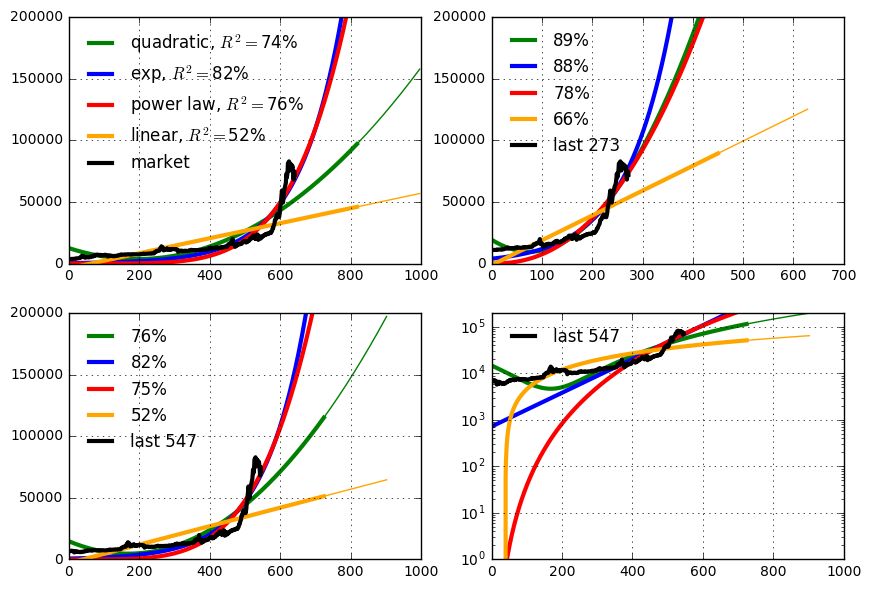

In [340]:
fig,ax=plt.subplots(2,2,figsize=(10,7))
z=178
f1=sp.curve_fit(f,df['x'].values,df['Close'].values)
g1=sp.curve_fit(g,df['x'].values,df['Close'].values)
h1=sp.curve_fit(h,df['x'].values,df['Close'].values)
r1=sp.curve_fit(r,df['x'].values,df['Close'].values)
x=np.arange(2,max(df['x'])+z)
x2=np.arange(2,max(df['x'])+z*2)
ax[0][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(df['x'].values,df['Close'].values,f(df['x'].values,*f1[0]))
ax[0][0].plot(x,fdata,lw=3,c='green',label='quadratic, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(df['x'].values,df['Close'].values,g(df['x'].values,*g1[0]))
ax[0][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label='exp, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(df['x'].values,df['Close'].values,h(df['x'].values,*h1[0]))
ax[0][0].plot(x,h(x,*h1[0]),lw=3,c='red',label='power law, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(df['x'].values,df['Close'].values,r(df['x'].values,*r1[0]))
ax[0][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label='linear, $R^2=$'+repr(int(rlabel*10000)/100)+"%")
ax[0][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][0].plot(df['x'],df['Close'],c='k',label=c,lw=3)
ax[0][0].legend(loc=2,framealpha=0)

k=int(365*0.75)
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[0][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[0][1].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[0][1].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
ax[0][1].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[0][1].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[0][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[0][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[0][1].legend(loc=2,framealpha=0)

k=int(365*1.5)
f1=sp.curve_fit(f,np.arange(k),df['Close'].values[-k:])
g1=sp.curve_fit(g,np.arange(k),df['Close'].values[-k:])
h1=sp.curve_fit(h,np.arange(k),df['Close'].values[-k:])
r1=sp.curve_fit(r,np.arange(k),df['Close'].values[-k:])
x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][0].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][0].plot(x,fdata,lw=3,c='green',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][0].plot(x,g(x,*g1[0]),lw=3,c='blue',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
ax[1][0].plot(x,h(x,*h1[0]),lw=3,c='red',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][0].plot(x,r(x,*r1[0]),lw=3,c='orange',label=repr(int(rlabel*10000)/100)+"%")
ax[1][0].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][0].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][0].legend(loc=2,framealpha=0)

x=np.arange(2,k+z)
x2=np.arange(2,k+z*2)
ax[1][1].grid()
fdata=f(x,*f1[0])
rlabel=rsq(np.arange(k),df['Close'].values[-k:],f(np.arange(k),*f1[0]))
ax[1][1].plot(x,fdata,lw=3,c='green')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,f(x2,*f1[0]),c='green')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],g(np.arange(k),*g1[0]))
ax[1][1].plot(x,g(x,*g1[0]),lw=3,c='blue')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,g(x2,*g1[0]),c='blue')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],h(np.arange(k),*h1[0]))
ax[1][1].plot(x,h(x,*h1[0]),lw=3,c='red')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,h(x2,*h1[0]),c='red')
rlabel=rsq(np.arange(k),df['Close'].values[-k:],r(np.arange(k),*r1[0]))
ax[1][1].plot(x,r(x,*r1[0]),lw=3,c='orange')#,label=repr(int(rlabel*10000)/100)+"%")
ax[1][1].plot(x2,r(x2,*r1[0]),c='orange')
ax[1][1].plot(np.arange(k),df['Close'][-k:],c='k',label='last '+repr(k),lw=3)
ax[1][1].legend(loc=2,framealpha=0)
ax[1][1].set_yscale('log')

y1=1
y2=200000
ax[0][0].set_ylim(y1,y2)
ax[0][1].set_ylim(y1,y2)
ax[1][0].set_ylim(y1,y2)
ax[1][1].set_ylim(y1,y2)
plt.savefig(c+'.png')